## Task 4.9 Part 2

### Import libraries and data frame

In [1]:
# import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import last updated final merged data set
path = r'C:\Users\98912\MAY 2022 Instacart Analysis'
final_merged = pd.read_pickle(os.path.join(path, '02-Data', 'Prepared Data', 'final_merged.pkl'))
final_merged.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prder_price,spending_flag,order_frequency,frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New_customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New_customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New_customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New_customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Slowest days,Most orders,8,New_customer,7.988889,Low spender,19.0,Regular customer


In [3]:
final_merged.shape

(32404859, 33)

### Create bar chart, a histogram, a scatterplot, and a line chart

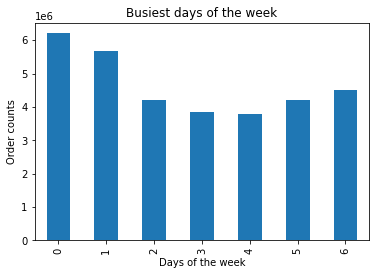

In [4]:
# create bar chart
bar1 = final_merged['order_day_of_week'].value_counts().sort_index().plot.bar(xlabel = 'Days of the week', ylabel = 'Order counts', title = 'Busiest days of the week')

In [5]:
# save the chart
bar1.figure.savefig(os.path.join(path, '04-Analysis', 'busydays.png'))

<AxesSubplot:ylabel='Frequency'>

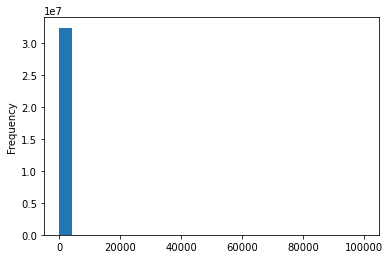

In [8]:
# create histogram
final_merged['prices'].plot.hist(bins=25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

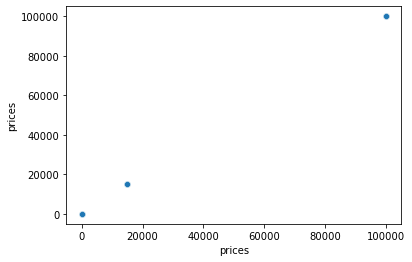

In [9]:
# to detect the outliers in 'prices' we plot the scatterplot
sns.scatterplot(x='prices', y='prices', data=final_merged)

In [10]:
# to remove the anomalies from price coloumn
final_merged.loc[final_merged['prices']>100, 'prices'] = np.nan

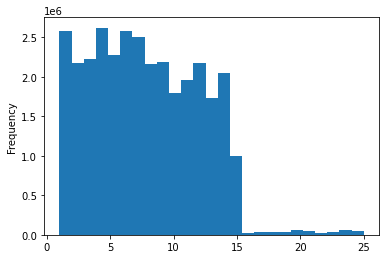

In [13]:
# plot histogram again
hist1 = final_merged['prices'].plot.hist(bins=25)

In [14]:
# save the chart
hist1.figure.savefig(os.path.join(path, '04-Analysis', 'histogram1.png'))

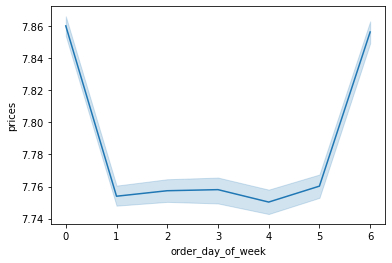

In [15]:
# to draw the line chart first we need to create a subsample
np.random.seed(4)
dev = np.random.rand(len(final_merged)) <= 0.7
small = final_merged[~dev]
df_2 = small[['order_day_of_week', 'prices']]
line = sns.lineplot(data = df_2, x='order_day_of_week', y='prices')

In [16]:
# save the chart
line.figure.savefig(os.path.join(path, '04-Analysis', 'lineplot1.png'))

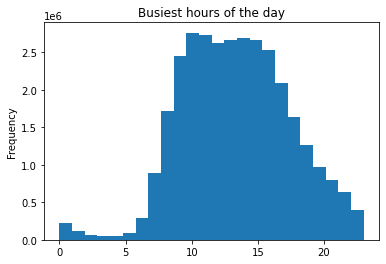

In [9]:
# 3 plot the histogram of 'order_hour_of_day'
hist2 = final_merged['order_hour_of_day'].plot.hist(bins=24, ylabel = 'Order counts', title = 'Busiest hours of the day',  xlabel = 'Hours of the day' )

#### According to this histogram the distribution of orders in hours of the day is skewd with a left tail. It also shows that the busiest hours of day are from 9 am to 4 pm. also between 0 to 6 am we have the least number of orders

In [7]:
# save the chart
hist2.figure.savefig(os.path.join(path, '04-Analysis', 'busiesthours.png'))

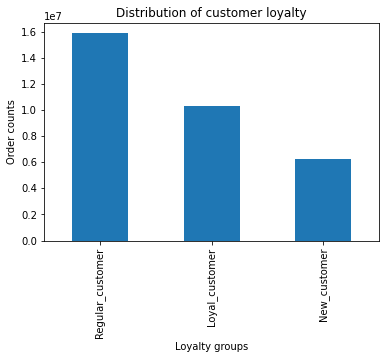

In [26]:
# 4 bar chart for loyalty_flag
bar2 = final_merged['loyalty_flag'].value_counts().plot.bar(ylabel = 'Order counts', title = 'Distribution of customer loyalty',  xlabel = 'Loyalty groups')

In [2]:
Piechart2 = final_merged['loyalty_flag'].value_counts().plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, explode = explode)

NameError: name 'final_merged' is not defined

In [1]:
# save the chart
Piechart2.figure.savefig(os.path.join(path, '04-Analysis', 'loyaltydistr.png'))

NameError: name 'Piechart2' is not defined

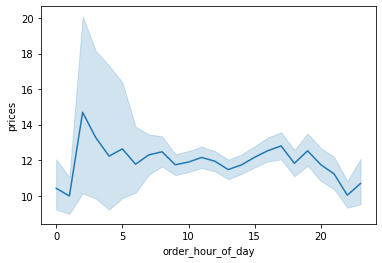

In [13]:
# linechart of price in different hours of the day (we use the same sample we provided in previous task)
#df_3 = small[['prices', 'order_hour_of_day']]
line2 = sns.lineplot(data=final_merged, x='order_hour_of_day', y='prices')

#### As this plot is so oscilating, we can not detect a clear relation between order hour and the prices

In [14]:
# save the chart
line2.figure.savefig(os.path.join(path, '04-Analysis', 'lineplot2.png'))

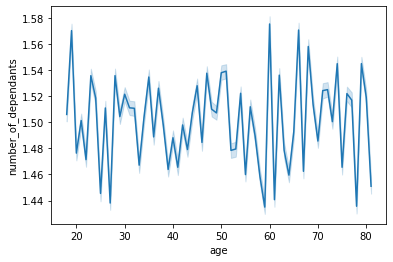

In [25]:
# 6 creating a lineplot for age and number of dependants
df_4 = small[['age', 'number_of_dependants']]
line3 = sns.lineplot(data=df_4, x='age', y='number_of_dependants')

In [27]:
# save the chart
line3.figure.savefig(os.path.join(path, '04-Analysis', 'lineplot3.png'))

#### There is no obvious relation between age and number of dependants as the linechart is very volatile and oscilating.

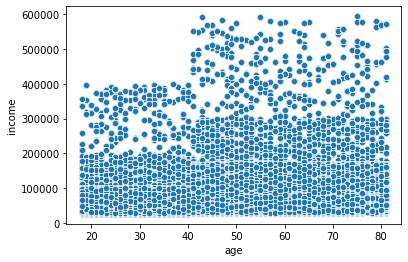

In [26]:
# 7 connection between age and spending power using the whole data set

scatplot = sns.scatterplot(data=final_merged, x='age', y='income')

#### This scatterplot shows that the income level of customers is different betwen people younger than 40 and those who are older than 40. This higher income for older people can be a result of financial stability due to more job experience and higher level of incomes for senior employees.

In [28]:
# save the chart
scatplot.figure.savefig(os.path.join(path, '04-Analysis', 'scatterplot.png'))

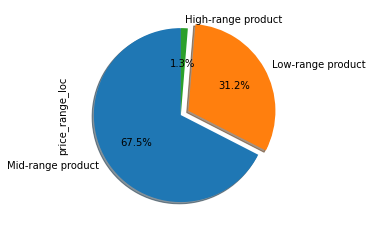

In [24]:
explode = (0, 0.1, 0)
piechart1 = final_merged['price_range_loc'].value_counts().plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, explode = explode, title = None)

In [25]:
piechart1.figure.savefig(os.path.join(path, '04-Analysis', 'piechart1.png'))